In [1]:
pip install xlrd

   ---------------------------------------- 0.0/96.6 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/96.6 kB ? eta -:--:--
   -------------------------------------- - 92.2/96.6 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 96.6/96.6 kB 928.1 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [259]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from collections import Counter
import numpy as np
import random

df = pd.read_excel("E:\\programming\\Fano planes\\res_clean.xlsx")

In [13]:
display(df)

,Draw,Draw Date,1,2,3,4,5,6,Bonus Ball,2nd Bonus Ball,Power Ball
0,2308,Saturday 16 September 2023,34,13,35,32,5,20,6,NaN,6.0
1,2307,Wednesday 13 September 2023,40,21,33,16,1,2,39,NaN,9.0
2,2306,Saturday 9 September 2023,37,8,4,24,17,32,12,NaN,1.0
3,2305,Wednesday 6 September 2023,25,22,32,26,36,13,21,NaN,4.0
4,2304,Saturday 2 September 2023,39,6,36,5,1,20,2,NaN,8.0
...,...,...,...,...,...,...,...,...,...,...,...
2303,5,Saturday 29 August 1987,23,7,3,8,12,11,15,NaN,NaN
2304,4,Saturday 22 August 1987,35,2,29,10,4,11,14,NaN,NaN
2305,3,Saturday 15 August 1987,11,26,18,39,22,5,38,NaN,NaN
2306,2,Saturday 8 August 1987,3,9,39,13,36,20,38,NaN,NaN


In [19]:
df.to_csv("E:\\programming\\Fano planes\\res_clean.csv")

In [241]:
file = open('res_clean.csv', 'r')
data = file.read().split('\n')
clean = [i.split(',') for i in data[1:]]
file.close()
draws_formatted = [[[int(j) for j in clean[i][3:9]], int(clean[i][9])] for i in range(len(clean)-1)]
combined_draws = [[int(j) for j in clean[i][3:10]] for i in range(len(clean)-1)]

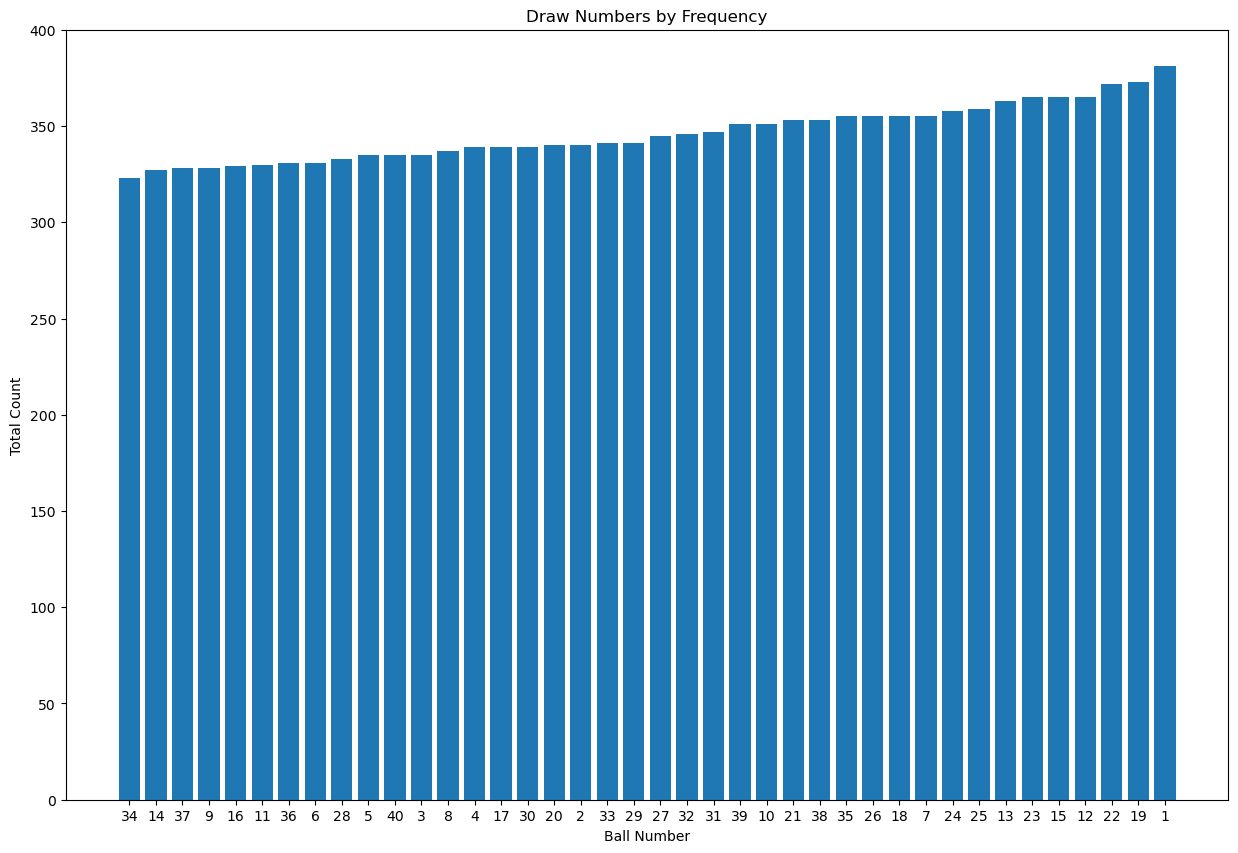

In [253]:
ord_freq = sorted(freq_dict.items(), key=lambda x: x[1])
num, count = zip(*ord_freq)
x_pos = np.arange(len(num))

fig, ax = plt.subplots(figsize=(15, 10))
ax.bar(x_pos, count)
ax.set_xticks(x_pos)
ax.set_xticklabels(num)
ax.set_title("Draw Numbers by Frequency")
ax.set_ylabel("Total Count")
ax.set_xlabel("Ball Number")
plt.show()


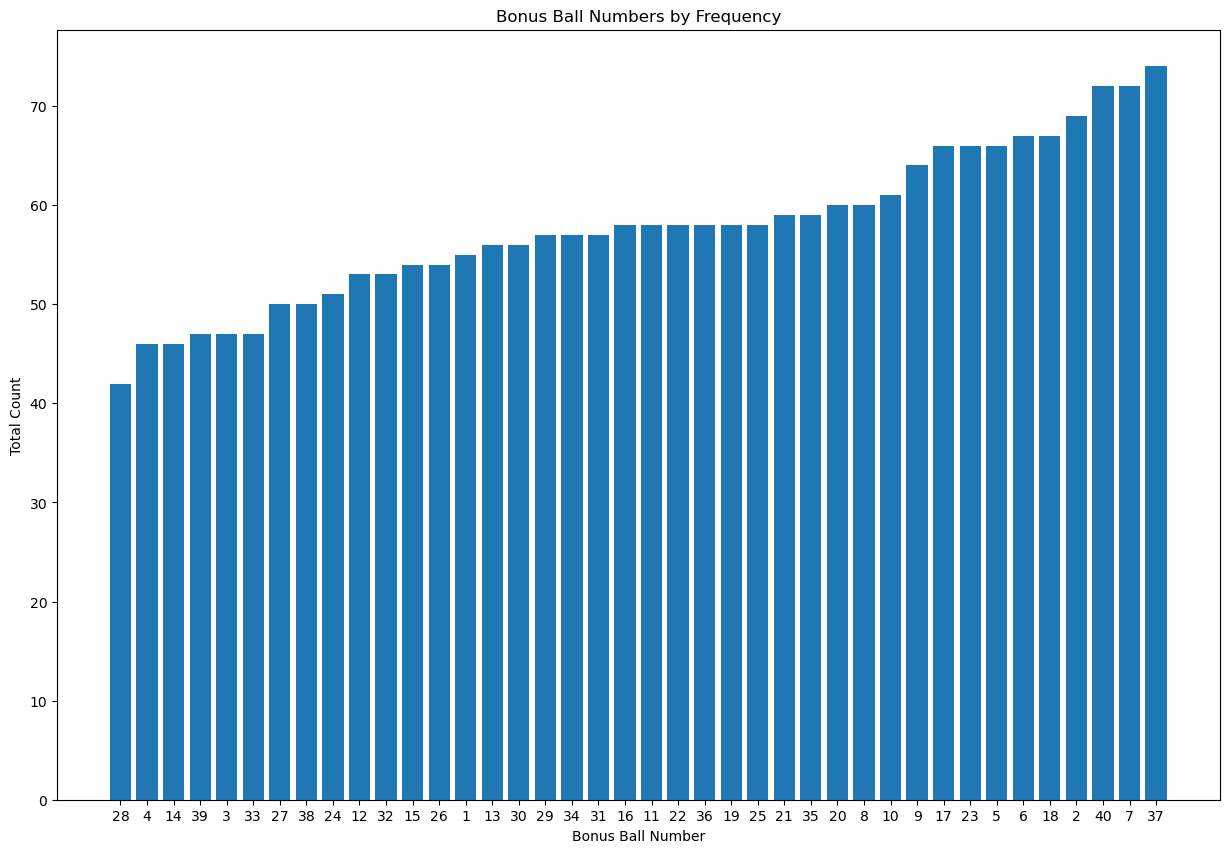

In [239]:
bonus_balls = [i[1] for i in draws_formatted]
bb_count = Counter()

for i in bonus_balls:
    bb_count[i] += 1

ord_bb = sorted(bb_count.items(), key=lambda x: x[1])
num, count = zip(*ord_bb)
x_pos = np.arange(len(num))

fig, ax = plt.subplots(figsize=(15, 10))
ax.bar(x_pos, count)
ax.set_xticks(x_pos)
ax.set_xticklabels(num)
ax.set_title("Bonus Ball Numbers by Frequency")
ax.set_ylabel("Total Count")
ax.set_xlabel("Bonus Ball Number")
plt.show()

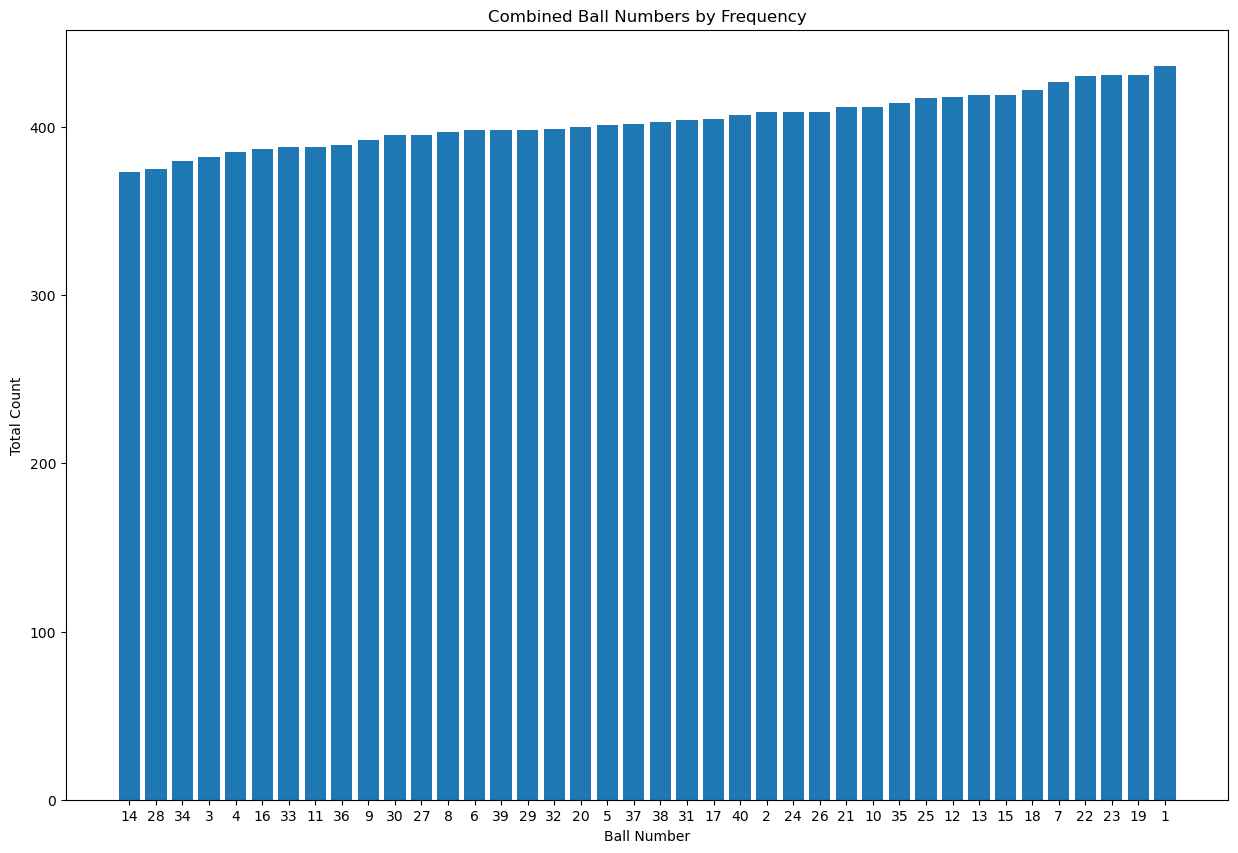

In [243]:
combined_freqs = Counter()

for draw in combined_draws:
    for number in draw:
        combined_freqs[number] += 1

ordered_combined = sorted(combined_freqs.items(), key=lambda x: x[1])
num, count = zip(*ordered_combined)
x_pos = np.arange(len(ordered_combined))

fig, ax = plt.subplots(figsize=(15, 10))
ax.bar(x_pos, count)
ax.set_xticks(x_pos)
ax.set_xticklabels(num)
ax.set_title("Combined Ball Numbers by Frequency")
ax.set_ylabel("Total Count")
ax.set_xlabel("Ball Number")
plt.show()

In [265]:
tot_balls = sum(combined_freqs.values())
tbb = 2308
tb = tot_balls - 2308

16156


In [307]:
balls = [set(random.sample(range(1, 41), 6)) for i in range(tbb)]
bonus = [random.choice([n for n in range(1, 41) if n not in i]) for i in balls]
rand_draws = [[list(balls[i]), bonus[i]] for i in range(len(balls))]
rand_combined_draws = [list(balls[i]) + [bonus[i]] for i in range(len(balls))]

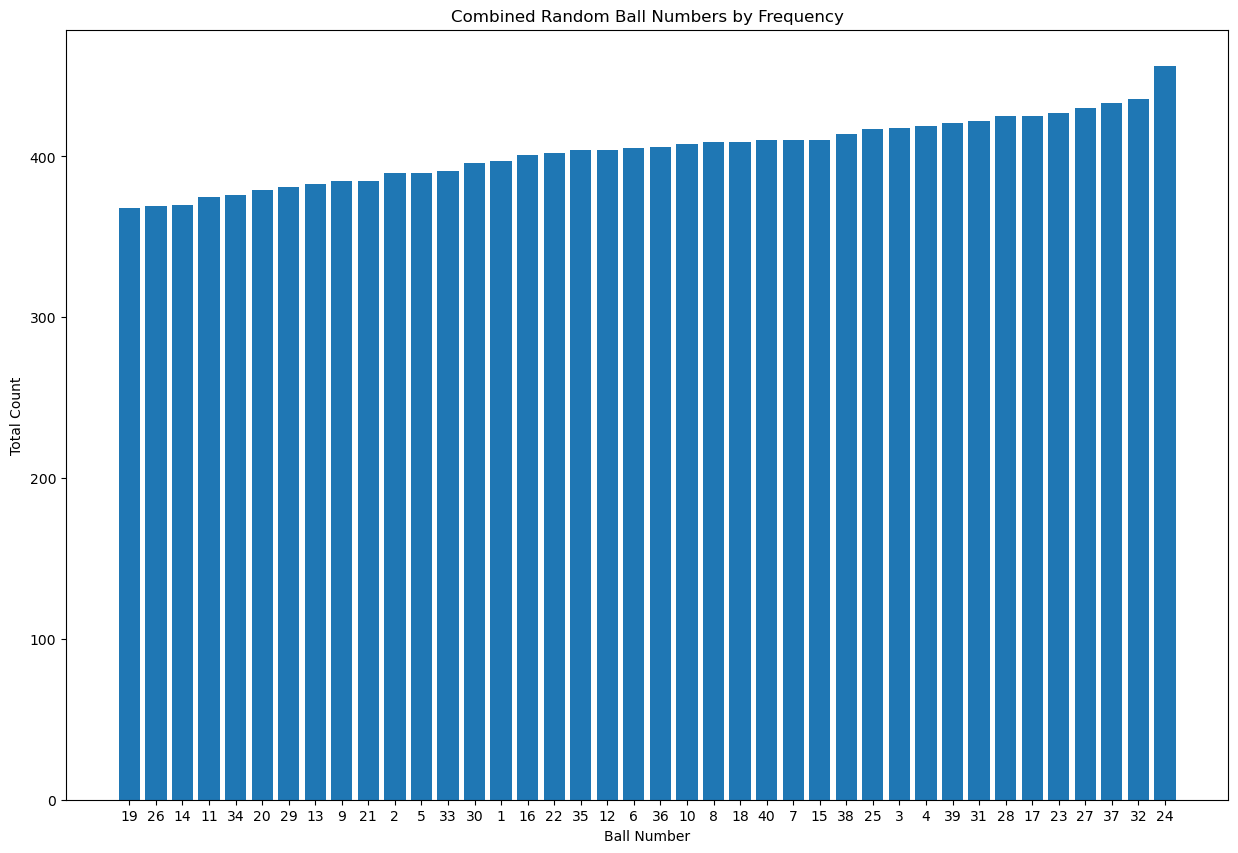

In [315]:
rand_combined_control = Counter()

for draw in rand_combined_draws:
    for ball in draw:
        rand_combined_control[ball] += 1

ordered_rand_combined_control = sorted(rand_combined_control.items(), key=lambda x: x[1])
num, count = zip(*ordered_rand_combined_control)
x_pos = np.arange(len(rand_combined_control))

fig, ax = plt.subplots(figsize=(15, 10))
ax.bar(x_pos, count)
ax.set_xticks(x_pos)
ax.set_xticklabels(num)
ax.set_title("Combined Random Ball Numbers by Frequency")
ax.set_ylabel("Total Count")
ax.set_xlabel("Ball Number")
plt.show()